<h1>Simulating polysomes as normally distributed masses</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from polan import find_poly_peaks, fit_peaks
def normpdf(x,mu,sigma):
    return 1/(np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-1 * ((x - mu) ** 2 / (2 * sigma ** 2)))

In [2]:
#read in the data file containing the yeast polysome profile
yeast_trace = pd.read_csv('Data/poly_yeast.csv')
#ensure that data are in ascending x axis order
yeast_trace = yeast_trace.sort_values('x')
#normalise x axis 
yeast_trace.x = yeast_trace.x / max(yeast_trace.x)
#detect well separated peaks
autopeaks = np.asarray(find_poly_peaks(yeast_trace))
#extrapolate additional peaks up to gradient end
extrapeaks,peakfun = fit_peaks(autopeaks,0.95,mode=0.34)

In [3]:
#list of peak locations
peak_locs = list(autopeaks) + list(extrapeaks)
#list of peak widths.These were manually adjusted to achieve a good fit in the figure below.
peak_widths = [0.012,0.014,0.017,0.014,0.013,0.012,0.012,0.01,0.01,0.009,0.009,0.009,0.009,0.009,0.009,0.009]
#list of peak scaling factors. These were manually adjusted to achieve a good fit in the figure below.
peak_scales = [0.0025,0.0051,0.032,0.018,0.0205,0.0155,0.012,0.0085,0.008,0.006,0.005,0.0035,0.002,0.0015,0.001,0.0005]

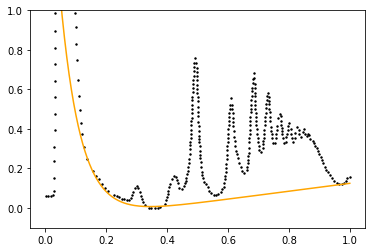

In [4]:
#adjust drift
x = np.linspace(0,1,num=400)
#define the baseline drifts: 
#'debris' represents the initial debris peak
debris = np.exp((-x-0.05)*15)*5
#'drift' represent the absorption of the sucrose gradient
drift = -0.075 + 0.2*x

baseline = drift + debris

plt.close()
fig,ax = plt.subplots()
ax.set_ylim((-0.1,1))
ax.scatter(yeast_trace.x,yeast_trace.y,s=2,c='black')
ax.plot(x,baseline,c ='orange')
plt.show()

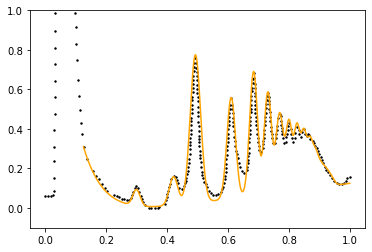

In [5]:
factor = 1.05
n = 3

######to adjust the width, height or volume of a peak, adjust the peak number and factor above, and uncomment the appropriate line below

#peak_widths[n] = peak_widths[n] * factor; peak_scales[n] = peak_scales[n] * factor
#peak_scales[n] = peak_scales[n] * factor
#peak_locs[n] = peak_locs[n] * factor

#display the adjusted peak
baseline = drift + debris
sum_trace = baseline
for loc in range(len(peak_locs)):
    this_peak = normpdf(x,peak_locs[loc],peak_widths[loc])*peak_scales[loc]
    sum_trace += this_peak
plt.close()
fig,ax = plt.subplots()
ax.set_ylim((-0.1,1))
ax.scatter(yeast_trace.x,yeast_trace.y,s=2,c='black')
ax.plot(x[50:],sum_trace[50:],c ='orange')
plt.show()

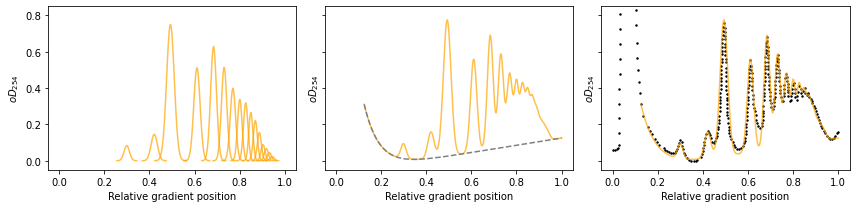

In [6]:
#prepare the publication figure

#construct the individual Gaussians and the summed trace for the polysome model
indiv_traces = []
baseline = drift + debris
sum_trace = baseline

for loc in range(len(peak_locs)):
    this_peak = normpdf(x,peak_locs[loc],peak_widths[loc])*peak_scales[loc]
    indiv_traces.append(this_peak)
    sum_trace += this_peak

fig,ax = plt.subplots(1,3,figsize=(12,3),sharex=True,sharey=True)
#plot separated Gaussians
display_limit = 0.0001
for n in range(len(indiv_traces)):
    y = indiv_traces[n]
    ax[0].plot(x[y >= display_limit], y[y >= display_limit],c='orange',alpha=0.7)
ax[0].set_xlabel('Relative gradient position')
ax[0].set_ylabel(r'$oD_{254}$')
#plot fitted trace
ax[1].plot(x[50:],sum_trace[50:],c='orange',alpha=0.7)
ax[1].plot(x[50:],(drift+debris)[50:],c='grey',linestyle='--')
ax[1].set_ylim((-0.05,0.85))
ax[1].set_xlabel('Relative gradient position')
ax[1].set_ylabel(r'$oD_{254}$')
#plot overlay
ax[2].scatter(yeast_trace['x'],yeast_trace['y'],c='black',s=2)
ax[2].plot(x[50:],sum_trace[50:],c='orange',alpha=0.7)
ax[2].set_ylim((-0.05,0.85))
ax[2].set_xlabel('Relative gradient position')
ax[2].set_ylabel(r'$oD_{254}$')
fig.tight_layout()
#plt.savefig('Figure 3.svg')
plt.show()